# **Customer Churn Prediction** 
'Churn' - It is the measure of how many customers stop using a product.

## **Introduction**
In the competitive landscape of business, maximizing profit margins and ensuring customer retention are paramount objectives for companies across industries. Leveraging the power of machine learning, organizations are increasingly turning to classification models to conduct churn analysis on their customer base. Classification, a fundamental concept in machine learning and statistics, involves a supervised learning approach where algorithms learn from existing data to predict and classify new observations.  

## **Business Understanding Statement**
In today's competitive business environment, maximizing profit margins and retaining customers are top priorities for companies across industries. Leveraging the capabilities of machine learning, organizations are increasingly adopting classification models for churn analysis, a critical aspect of customer relationship management. Classification models, rooted in machine learning and statistics, enable businesses to predict and categorize customers based on their likelihood of churning, thereby empowering proactive retention strategies and sustainable growth.
## **Objective**
The objective of this project is to develop and deploy robust classification models for customer churn analysis using advanced machine learning techniques. Specifically, my goal is to:
1. Utilize historical customer data to train and validate classification algorithms that accurately predict customer churn probabilities.
2. Implement scalable and interpretable machine learning models that can categorize customers into churn-risk segments for targeted retention efforts.
3. Optimize model performance by fine-tuning hyperparameters, feature selection, and model evaluation metrics to achieve high accuracy and predictive power.
4. Integrate the developed models into existing business processes, enabling real-time churn prediction and actionable insights for decision-makers.
5. Evaluate the effectiveness of the deployed models through continuous monitoring, validation, and refinement to ensure long-term sustainability and impact on customer retention and profitability.  

By achieving these objectives, I aim to empower businesses with actionable insights derived from data-driven churn analysis, enabling them to implement proactive retention strategies, optimize resource allocation, and drive sustainable growth in today's competitive market landscape.
## **Project Goals(KPIs)**
- Develop accurate classification models for churn prediction.
- Optimize retention strategies based on model insights.
- Drive sustainable growth and profitability by reducing churn rates.
- Provide actionable insights for informed decision-making.
- Enhance customer experience and engagement.

### Importing Necessary Packages

In [36]:
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### Loading Environment variables

In [37]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [38]:
connection = pyodbc.connect(connection_string)

#### Geting the Training data
Using SQL to generate the table

In [39]:
# Selecting data using the SQL syntax
query = "Select * from dbo.LP2_Telco_churn_first_3000"
# Reading the first part of training data into a data frame
data1 = pd.read_sql(query, connection)

#### Getting the second Training dataset
The second dataset is downloaded to my local drive and loaded to the python environment

In [40]:
# Loading second training data
data2 = pd.read_csv("C:/Users/EWamathai/Desktop/Customer Churn Prediction/Customer-Churn-Prediction/files/LP2_Telco-churn-second-2000.csv")

### Concating the training datasets

In [41]:
# Loading the two dataframes into a variable
data3 = [data1, data2]
# Concatenation of the data frames
train_df = pd.concat(data3, ignore_index=True)

In [42]:
# Checking training data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## **Data-Frame Understanding**  
**Data Integrity**  
The DataFrame contains 5043 entries across 21 columns and thus a substantial dataset for analysis. Most columns have non-null counts indicating complete data, but there are missing values in 
- MultipleLines
- OnlineSecurity 
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- TotalCharges
- Churn  

**Data Types**  
- The 'SeniorCitizen' column is represented as an integer, indicating a binary variable (likely indicating whether the customer is a senior citizen or not).  
- 'MonthlyCharges' is correctly represented as a float, but 'TotalCharges' is shown as an object, which may need conversion to numeric for numerical analysis.  

**Categorical Variables**  
- Several columns such as 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', and 'Churn' are categorical variables, likely representing customer characteristics, services subscribed to, and contract details.  
- The 'Churn' column is the target variable indicating whether a customer churned or not.  

**Numeric Variables**  
- 'tenure' represents the number of months a customer has stayed with the company, which can be a significant predictor of churn.  
- 'MonthlyCharges' and 'TotalCharges' are likely related to billing information and customer spending, which can also be important predictors of churn.  

**Data Cleaning and Preprocessing**  
- Missing values in 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', and 'Churn' may require imputation or removal depending on their impact on the analysis.  
- The 'TotalCharges' column should be converted to a numeric data type for numerical computations.  

**Churn Analysis**  
Since the goal is to predict customer churn, analyzing the distribution of 'Churn' values (e.g., churned vs. non-churned customers) and exploring relationships between predictor variables and churn status will be crucial.  

**Feature Engineering**  
Creating new features or deriving insights from existing ones (e.g., customer tenure in months, total spending) can enhance the predictive power of the model.

## **Business Questions**
- **Demographic Analysis**
1. How does customer churn vary based on demographic factors such as gender, age (SeniorCitizen), marital status (Partner), and presence of dependents (Dependents)?
2.  Are there any specific demographic segments that are more prone to churn than others?
- **Tenure Analysis**
1. What is the relationship between customer tenure (length of subscription) and churn rate?
2.  Do long-tenured customers exhibit lower churn rates compared to new customers?
- **Service Usage Analysis**
1. How does the availability and utilization of services such as PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies impact customer churn?
2. Are customers subscribing to additional services less likely to churn?
- **Contract Analysis**
1. What is the churn rate among customers based on different contract types (Contract)?
2. Do customers with longer-term contracts exhibit lower churn rates compared to those with month-to-month contracts?
- **Billing Preferences**
1. Does the preference for paperless billing (PaperlessBilling) influence customer churn?
2. Are customers using certain payment methods (PaymentMethod) more likely to churn than others?
- **Financial Impact**
1. How do monthly charges (MonthlyCharges) and total charges (TotalCharges) affect customer churn?
2. Do customers with higher monthly charges or total charges have different churn behavior?
- **Customer Support Analysis**
1. What is the impact of customer support services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) on reducing churn?
2. Are customers who utilize tech support or security services less likely to churn?
- **Correlation Analysis**
1. Are there any significant correlations between different features (e.g., tenure, monthly charges, contract type) and customer churn?
2. Which factors have the strongest correlation with churn behavior?

## **Hypothesis Testing** 
**Null Hypothesis (H0):** The tenure of customers does not have a significant impact on the likelihood of customer churn in the company.  
**Alternative Hypothesis (H1):** The tenure of customers significantly affects the likelihood of customer churn in the company.   

This hypothesis focuses specifically on the impact of customer tenure on churn behavior

## **Data Cleaning and Preprocessing**

In [43]:
# Checking the training data frame
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### **Cleaning 'TotalCharges' Column**

In [44]:
# Checking total Charges column
train_df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5043 entries, 0 to 5042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
5038 non-null   object
dtypes: object(1)
memory usage: 39.5+ KB


In [45]:
# Converting the data types for the total charges column
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

In [46]:
train_df.isna().sum().sort_values(ascending=False)

OnlineBackup        651
OnlineSecurity      651
StreamingMovies     651
StreamingTV         651
TechSupport         651
DeviceProtection    651
MultipleLines       269
TotalCharges          8
Churn                 1
InternetService       0
gender                0
PhoneService          0
tenure                0
Dependents            0
Partner               0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
SeniorCitizen         0
customerID            0
dtype: int64

In [47]:
# Checking the nulls in the total charges column
train_df[train_df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,0,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,0,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,0,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,0,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


<span style="color: orange;">**Observation**</span>  All the 8 nulls in the 'TotalCharges' column are with respect to rows whose data in the 'tenure' column are zero. and thus, I will fill the nulls in the TotalCharges column using the corresponding values in the monthly charges. This is under the presumption that the tenure being zero means the customer has either just joined and thus not yet into a full tenure.

In [48]:
# Fill null values in 'TotalCharges' with 'MonthlyCharges' where 'tenure' is 0
train_df['TotalCharges'] = train_df.apply(lambda row: row['MonthlyCharges'] 
        if pd.isnull(row['TotalCharges']) and row['tenure'] == 0 
        else row['TotalCharges'], axis=1)

In [49]:
print(f'The null values in the Total Charges column is now: {train_df['TotalCharges'].isnull().sum()}')

The null values in the Total Charges column is now: 0


#### **Filling the nulls in the Multiplelines Column**

In [50]:
# Checking Total Nulls in MultipleLines
print(f'The null values in the MultipleLines column is now: {train_df['MultipleLines'].isnull().sum()}')

The null values in the MultipleLines column is now: 269


In [51]:
train_df[train_df['MultipleLines'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
7,6713-OKOMC,Female,0,False,False,10,False,None,DSL,True,...,False,False,False,False,Month-to-month,False,Mailed check,29.750000,301.899994,False
20,8779-QRDMV,Male,1,False,False,1,False,None,DSL,False,...,True,False,False,True,Month-to-month,True,Electronic check,39.650002,39.650002,True
27,8665-UTDHZ,Male,0,True,True,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Electronic check,30.200001,30.200001,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,9443-JUBUO,Male,0,True,True,72,False,None,DSL,True,...,True,True,True,True,Two year,True,Credit card (automatic),65.250000,4478.850098,False
2990,2309-OSFEU,Male,0,False,False,10,False,None,DSL,False,...,False,False,False,True,Month-to-month,True,Mailed check,33.900002,298.450012,True
2992,4177-JPDFU,Male,0,False,False,12,False,None,DSL,False,...,False,True,False,False,Month-to-month,False,Mailed check,34.000000,442.450012,False
2994,8046-DNVTL,Male,0,True,False,62,False,None,DSL,True,...,False,True,False,False,Two year,True,Credit card (automatic),38.599998,2345.550049,False


<span style="color: orange;">**Observation**</span> The 'Multiple Lines' column indicates whether a client has more than one phone line. This information is dependent on whether the client has phone service. Therefore, the null values in the 'Multiple Lines' column will be replaced with the corresponding entry from the 'PhoneService' column, indicating whether the client has phone service or not.

In [52]:
# Checking the unique values in both columns
unique_phone_service = train_df['PhoneService'].unique().tolist()
unique_multi_lines = train_df['MultipleLines'].unique().tolist()
print(f'The unique phone service entries are {unique_phone_service},\nWhile the unique multiline entries are {unique_multi_lines}')

The unique phone service entries are [False, True, 'Yes', 'No'],
While the unique multiline entries are [None, False, True, 'No', 'No phone service', 'Yes']


<span style="color: orange;">**Observation**</span>   
The unique values in the Phone Service column, False, True, 'Yes' and 'No', show a distinct pattern.  
- The first category, True and 'Yes', indicate that the customer has phone service
- The second category, False and 'No', indicate that the client does not have a phone service.  

The unique values in the MultipleLines column, None, False, True, 'No', 'No phone service' and 'Yes', show a distinct pattern.  
- The first category, True and 'Yes', indicate that the customer has Multiple Lines
- The second category, False and 'No', and 'No phone service' indicate that the client does not have a phone service.
- The Third category, 'None', represents the null entries.  

<span style="color: orange;">**Action**</span>
1. Standardize the Phone Service column entries to True and false only by changing the 'No' and 'Yes' entries to False and True respectively. This will have the column with only two conditions: True(Client has Phone Service), False(Client does not have phone service)
2. Use the Phone Service column to standardize the Multiple lines column.
- First convert the 'Yes' to True, then 'No' and 'No phone service' to False.
- Then use the condition in the phone service column false when the entry is 'None' in the Multiple lines column to change that to False. This is under the presumption that, if the Entry is false, in the Phone service(Client does not have phone service), then none means the client cannot have multiple lines. this will standardize the entries in the multiple lines column to only two states, True and False


In [53]:
# Replace 'Yes' with True and 'No' with False
train_df['PhoneService'] = train_df['PhoneService'].replace({'Yes': True, 'No': False})

In [54]:
# Check unique entries in the phone service column
unique_phnsvs = train_df['PhoneService'].unique()
phn_svs_nulls = train_df['PhoneService'].isnull().sum()
print(f'The unique values in the phone Service column are {unique_phnsvs} and there are {phn_svs_nulls} null entries in the column.')

The unique values in the phone Service column are [False  True] and there are 0 null entries in the column.


In [55]:
# Replace 'Yes' with True and 'No' with False and 'No phone service to false'
train_df['MultipleLines'] = train_df['MultipleLines'].replace({'Yes': True, 'No': False, 'No phone service': False, 'None': False})
# Check unique entries in the phone service column
train_df['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [56]:
# Fill null entries in 'MultipleLines' based on 'PhoneService' condition
train_df.loc[train_df['PhoneService'] == False, 'MultipleLines'] = train_df['MultipleLines'].fillna(False)
# Check new null entries in Multiple lines column
print(f'The are now {train_df['MultipleLines'].isnull().sum()} null entries in the MultipleLines column and the unique values are {train_df['MultipleLines'].unique()}')

The are now 0 null entries in the MultipleLines column and the unique values are [False True]


In [57]:
# Checking new train_df null status
train_df.isna().sum().sort_values(ascending=False)

OnlineBackup        651
OnlineSecurity      651
StreamingMovies     651
StreamingTV         651
TechSupport         651
DeviceProtection    651
Churn                 1
MultipleLines         0
InternetService       0
PhoneService          0
gender                0
tenure                0
Dependents            0
Partner               0
SeniorCitizen         0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
customerID            0
dtype: int64

#### **Cleaning the OnlineBackup OnlineSecurity ,StreamingMovies, StreamingTV, TechSupport, DeviceProtection Columns**
<span style="color: orange;">**Observation**</span>  As observed in the null counts for the train_df data-frame, all 6 columns listed above have 651 null entries each. With this, the data-frame understanding shows that these column entries are as a result of the client having internet service or not and thus the entries in this columns are as a result of the entries in the InternetService column. All the null entries are directly related to the 'No' entry in the 'InternetService' column. Thus we will fill the nulls with false since the client does not have Internes service('No'), and thus these other services cannot be accessed from the company.

In [58]:
train_df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [59]:
# Filling the nulls in the six columns with the condition the 'No' from 'InternetService'
train_df.loc[train_df['InternetService'] == 'No', ['OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']] = train_df.loc[train_df['InternetService'] == 'No', ['OnlineBackup', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']].fillna(False)

#### Checking for Nulls in the train_df

In [60]:
#Checking new train_df null status
train_df.isna().sum().sort_values(ascending=False)

Churn               1
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
customerID          0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
OnlineBackup        0
dtype: int64

#### Droping The null in churn column

In [61]:
# Droping the row with null in the Churn column
train_df = train_df.dropna(subset=['Churn'])

In [62]:
# Checking the train_df 
train_df['Churn'].isna().sum()

0

#### Checking the unique columns in the Dataframe 

In [63]:
# Displaying unique values for each column as a table
unique_values_table = pd.DataFrame(columns=['Column Name', 'Unique Values'])
for column in train_df.columns:
    unique_values = train_df[column].unique()
    unique_values_table.loc[len(unique_values_table)] = [column, unique_values]
unique_values_table

,Column Name,Unique Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,"[Female, Male]"
2,SeniorCitizen,"[0, 1]"
3,Partner,"[True, False, No, Yes]"
4,Dependents,"[False, True, No, Yes]"
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,"[False, True]"
7,MultipleLines,"[False, True]"
8,InternetService,"[DSL, Fiber optic, No]"
9,OnlineSecurity,"[False, True, No, Yes, No internet service]"


<span style="color: orange;">**Observation**</span>   

| Column Name        | Observations                                             | Cleaning Needed                                                                                    |
|---------------------|----------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| customerID          | Contains unique customer identifiers.                     | None                      |
| gender              | Gender information with values 'Female' and 'Male'.       | None -  values are standard and categorical.                                       |
| SeniorCitizen       | Indicates whether the customer is a senior citizen.       | None                                                |
| Partner             | Values include 'True', 'False', 'No', and 'Yes'.          | Convert 'No' to 'False' and 'Yes' to 'True' for consistency.                                         |
| Dependents          | Values include 'False', 'True', 'No', and 'Yes'.          | Convert 'No' to 'False' and 'Yes' to 'True' for consistency.                                         |
| tenure              | Represents the tenure of the customer.                    | Ensure the tenure values are numeric and handle any outliers or missing values appropriately.       |
| PhoneService        | Boolean values indicating phone service subscription.     | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| MultipleLines       | Boolean values indicating multiple lines subscription.    | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| InternetService     | Type of internet service with values 'DSL', 'Fiber optic', and 'No'. | None -                       |
| OnlineSecurity      | Boolean values indicating online security subscription.   | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| OnlineBackup        | Boolean values indicating online backup subscription.     | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| DeviceProtection    | Boolean values indicating device protection subscription.| Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| TechSupport         | Boolean values indicating tech support subscription.      | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| StreamingTV         | Boolean values indicating streaming TV subscription.      | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| StreamingMovies     | Boolean values indicating streaming movies subscription. | Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| Contract            | Type of contract with values 'Month-to-month', 'One year', 'Two year'. | None - values are standard and categorical.                                       |
| PaperlessBilling    | Boolean values indicating paperless billing subscription.| Ensure consistency in values (e.g., convert 'No internet service' to 'False' for boolean columns).  |
| PaymentMethod       | Payment methods used by customers.                        | None                      |
| MonthlyCharges      | Numeric values representing monthly charges.               | None                            |
| TotalCharges        | Numeric values representing total charges.                 | None                      |
| Churn               | Indicates whether the customer churned.                    | Convert 'No' to 'False' and 'Yes' to 'True' for consistency.                                         |

#### Cleaning the Boolean Columns for consistency

In [64]:
# List of columns with boolean dtype
boolean_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PaperlessBilling', 'Churn']

# Replace other boolean values with 'True' and 'False'
for column in boolean_columns:
    train_df[column] = train_df[column].replace({'Yes': True, 'No': False, 'No internet service': False})

#### Checking for data consistency

In [65]:
# Display unique values for each column as a table
unique_values_table = pd.DataFrame(columns=['Column Name', 'Unique Values'])

for column in train_df.columns:
    unique_values = train_df[column].unique()
    unique_values_table.loc[len(unique_values_table)] = [column, unique_values]

print(unique_values_table)

         Column Name                                      Unique Values
0         customerID  [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
1             gender                                     [Female, Male]
2      SeniorCitizen                                             [0, 1]
3            Partner                                      [True, False]
4         Dependents                                      [False, True]
5             tenure  [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
6       PhoneService                                      [False, True]
7      MultipleLines                                      [False, True]
8    InternetService                             [DSL, Fiber optic, No]
9     OnlineSecurity                                      [False, True]
10      OnlineBackup                                      [True, False]
11  DeviceProtection                                      [False, True]
12       TechSupport                                      [False

In [66]:
train_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5042,5042,5042.000000,5042,5042,5042.000000,5042,5042,5042,5042,...,5042,5042,5042,5042,5042,5042,5042,5042.000000,5042.000000,5042
unique,5042,2,NaN,2,2,NaN,2,2,3,2,...,2,2,2,2,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,False,False,NaN,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,NaN,NaN,False
freq,1,2558,NaN,2585,3481,NaN,4553,2913,2247,3587,...,3299,3551,3098,3061,2744,2995,1699,NaN,NaN,3706
mean,NaN,NaN,0.162436,NaN,NaN,32.568822,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.081376,2297.381328,NaN
std,NaN,NaN,0.368886,NaN,NaN,24.525954,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.064564,2268.318160,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.400000,18.799999,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.762500,415.637498,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.550003,1398.125000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.050002,3857.012573,NaN


<span style="color: orange;">**Observation**</span>   

| Column Name       | Observation                                                                                          |
|-------------------|------------------------------------------------------------------------------------------------------|
| customerID        | Unique identifier for customers, no missing values.                                                    |
| gender            | Categorical variable with two unique values ('Male' and 'Female').                                    |
| SeniorCitizen     | Binary variable (0 or 1) indicating if the customer is a senior citizen, about 16% are senior citizens.|
| Partner & Dependents | Binary variables indicating if the customer has a partner or dependents ('True' or 'False').        |
| tenure            | Numeric variable representing the duration of the customer's tenure, ranging from 0 to 72 months.      |
| PhoneService & MultipleLines | Binary variables indicating if the customer has phone service or multiple lines ('True' or 'False').|
| InternetService   | Categorical variable indicating the type of internet service ('DSL', 'Fiber optic', or 'No').         |
| OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies | Binary variables indicating if the customer has online security, device protection, tech support, streaming TV, or streaming movies ('True' or 'False'). |
| Contract & PaperlessBilling | Categorical variable indicating the type of contract and if the customer uses paperless billing.       |
| PaymentMethod     | Categorical variable indicating the payment method.                                                    |
| MonthlyCharges    | Numeric variable representing the monthly charges for services.                                        |
| TotalCharges      | Numeric variable representing the total charges for services.                                          |
| Churn             | Binary variable indicating if the customer churned ('True' or 'False'), 'False' is common.             |

In [67]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## Bivariate and Multivariate analysis

### Multi Variate Analysis

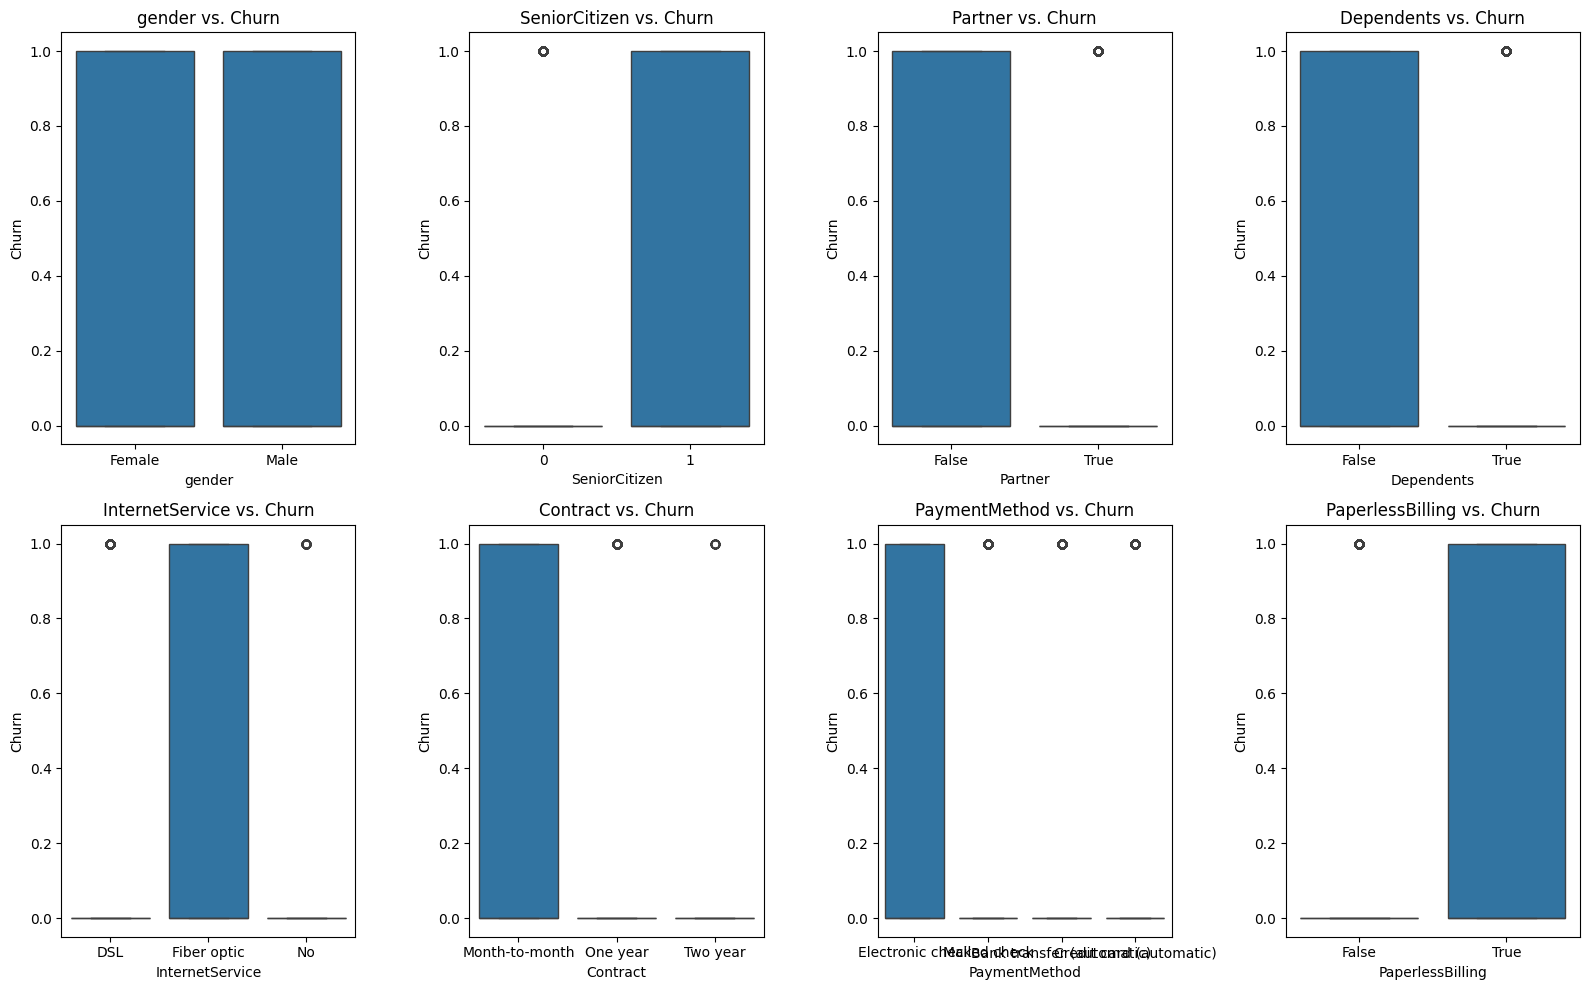

In [68]:
# Define the list of columns for multivariate analysis
columns_to_compare = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                      'InternetService', 'Contract', 'PaymentMethod', 'PaperlessBilling']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))

# Create box plots for each column
for i, column in enumerate(columns_to_compare):
    row = i // 4
    col = i % 4
    sns.boxplot(x=column, y='Churn', data=train_df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

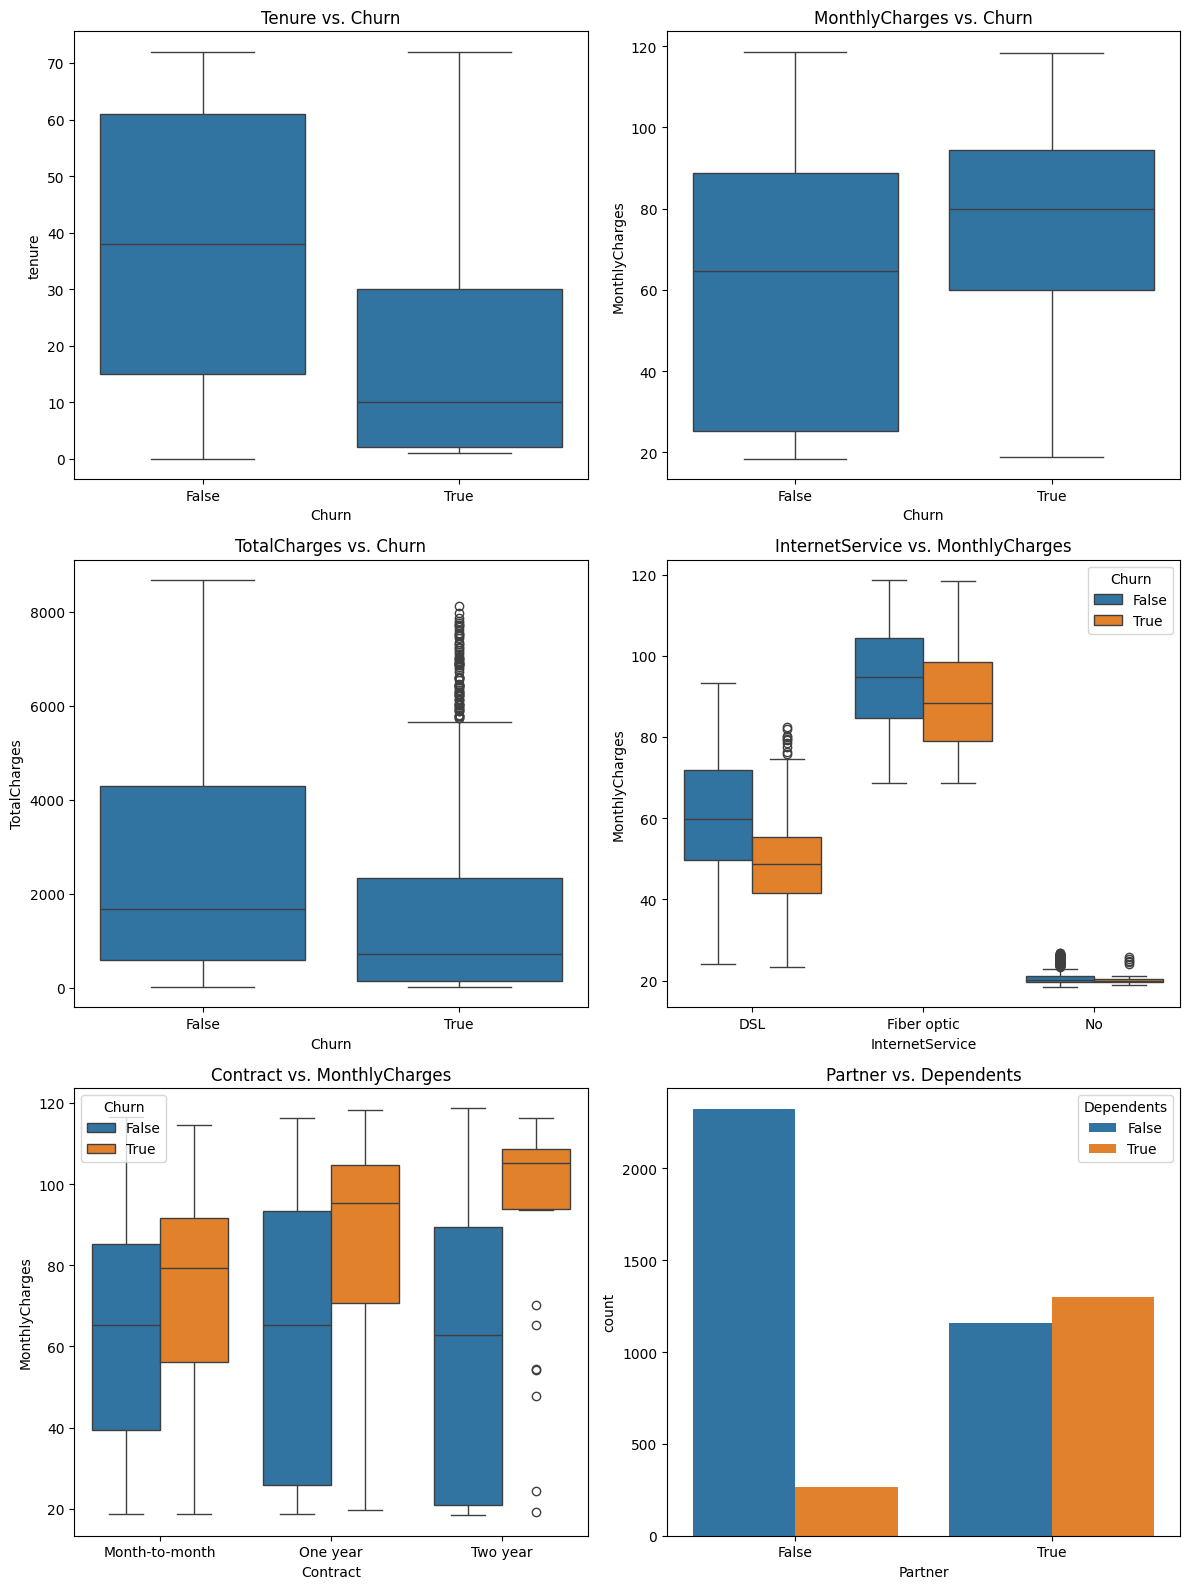

In [69]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 16))

# Bivariate analysis: Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=train_df, ax=axes[0, 0])
axes[0, 0].set_title('Tenure vs. Churn')

# Bivariate analysis: MonthlyCharges vs. Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df, ax=axes[0, 1])
axes[0, 1].set_title('MonthlyCharges vs. Churn')

# Bivariate analysis: TotalCharges vs. Churn (assuming TotalCharges is numeric)
sns.boxplot(x='Churn', y='TotalCharges', data=train_df, ax=axes[1, 0])
axes[1, 0].set_title('TotalCharges vs. Churn')

# Bivariate analysis: InternetService vs. MonthlyCharges
sns.boxplot(x='InternetService', y='MonthlyCharges', hue='Churn', data=train_df, ax=axes[1, 1])
axes[1, 1].set_title('InternetService vs. MonthlyCharges')

# Bivariate analysis: Contract vs. MonthlyCharges
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=train_df, ax=axes[2, 0])
axes[2, 0].set_title('Contract vs. MonthlyCharges')

# Bivariate analysis: Partner vs. Dependents
sns.countplot(x='Partner', hue='Dependents', data=train_df, ax=axes[2, 1])
axes[2, 1].set_title('Partner vs. Dependents')

# Adjust layout
plt.tight_layout()
plt.show()

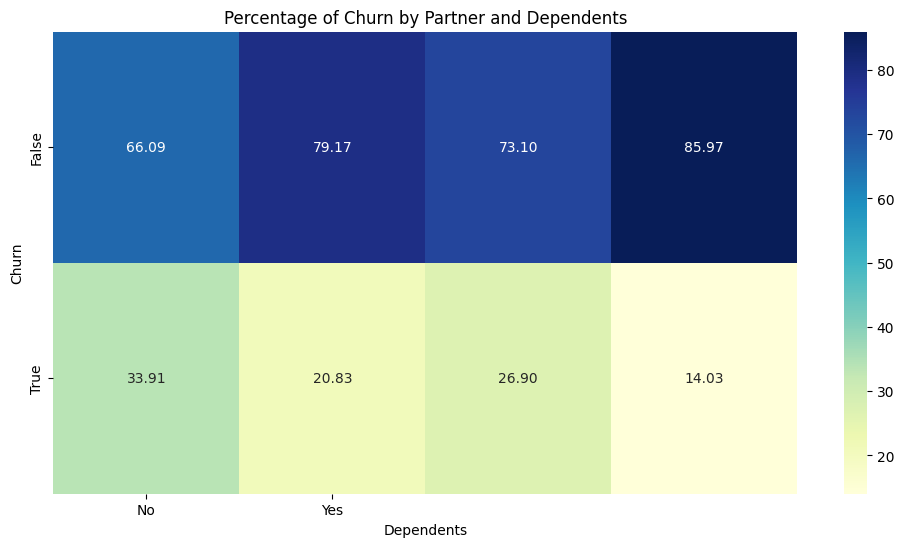

In [34]:
# Calculate percentage of churn for each combination of variables
bivariate_counts = pd.crosstab(index=train_df['Churn'], columns=[train_df['Partner'], train_df['Dependents']], normalize='columns') * 100

# Plotting the percentages of churn
plt.figure(figsize=(12, 6))
sns.heatmap(bivariate_counts, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage of Churn by Partner and Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn')
plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])
plt.show()

# Answering Business Questions
### Question 1: **Demographic Analysis**
1. How does customer churn vary based on demographic factors such as gender, age (SeniorCitizen), marital status (Partner), and presence of dependents (Dependents)?
2.  Are there any specific demographic segments that are more prone to churn than others?

In [70]:
# Calculate churn rate based on gender
gender_churn_rate = train_df.groupby('gender')['Churn'].mean()

# Calculate churn rate based on SeniorCitizen
senior_churn_rate = train_df.groupby('SeniorCitizen')['Churn'].mean()

# Calculate churn rate based on Partner status
partner_churn_rate = train_df.groupby('Partner')['Churn'].mean()

# Calculate churn rate based on Dependents status
dependents_churn_rate = train_df.groupby('Dependents')['Churn'].mean()

# Display the churn rates
print("Churn Rate based on Demographic Factors:")
print("Gender:")
print(gender_churn_rate)
print("\nSeniorCitizen:")
print(senior_churn_rate)
print("\nPartner:")
print(partner_churn_rate)
print("\nDependents:")
print(dependents_churn_rate)

Churn Rate based on Demographic Factors:
Gender:
gender
Female    0.266103
Male      0.263878
Name: Churn, dtype: float64

SeniorCitizen:
SeniorCitizen
0    0.235851
1    0.415140
Name: Churn, dtype: float64

Partner:
Partner
False    0.325725
True     0.201058
Name: Churn, dtype: float64

Dependents:
Dependents
False    0.315714
True     0.151826
Name: Churn, dtype: float64


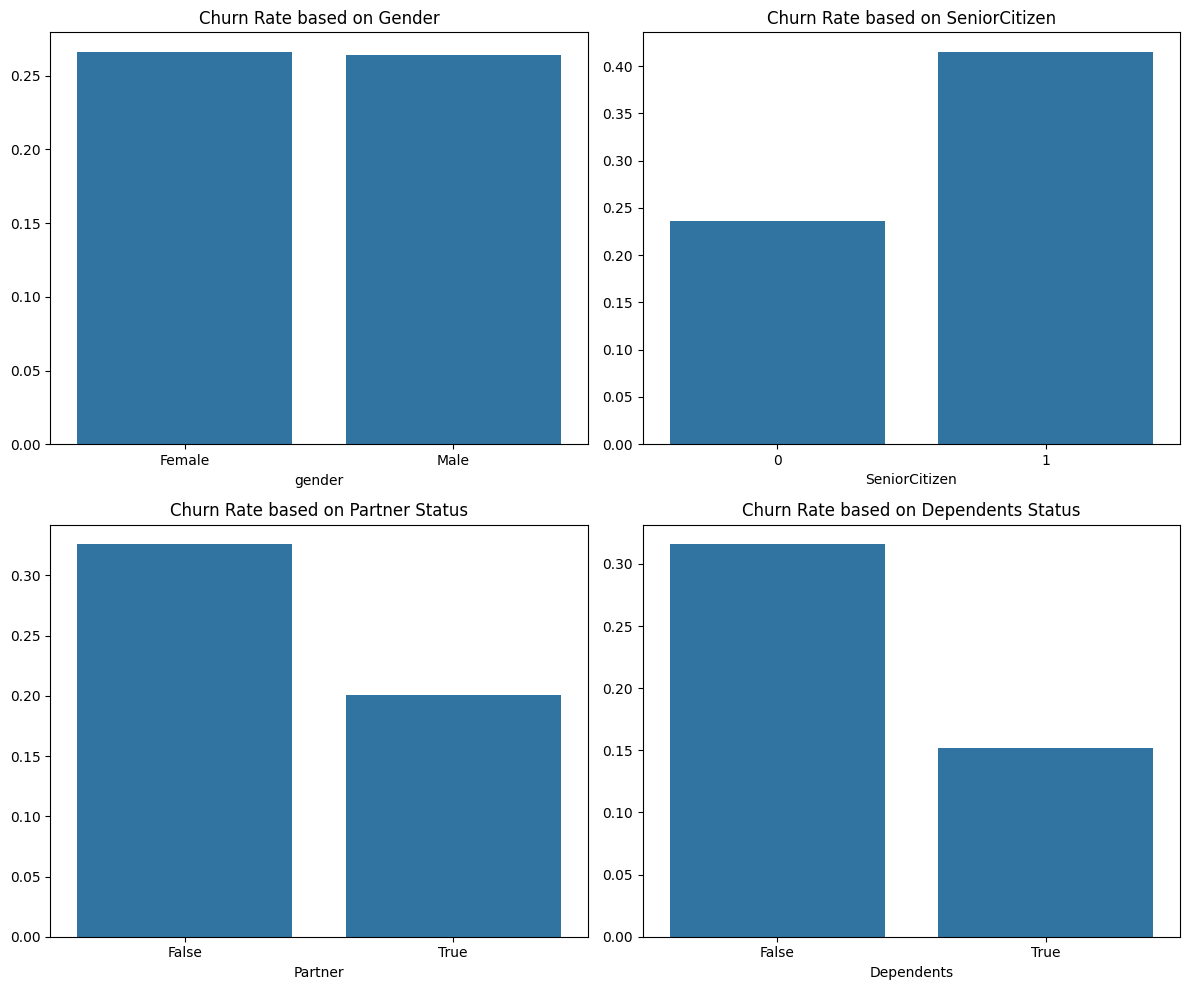

In [72]:
# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Churn rate based on gender
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate based on Gender')

# Churn rate based on SeniorCitizen
sns.barplot(x=senior_churn_rate.index, y=senior_churn_rate.values, ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate based on SeniorCitizen')

# Churn rate based on Partner status
sns.barplot(x=partner_churn_rate.index, y=partner_churn_rate.values, ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate based on Partner Status')

# Churn rate based on Dependents status
sns.barplot(x=dependents_churn_rate.index, y=dependents_churn_rate.values, ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate based on Dependents Status')

# Adjust layout
plt.tight_layout()
plt.show()

<span style="color: orange;">**Observation**</span>   
1. Gender: Both genders, female and male, have similar churn rates, with females slightly higher at 26.61% and males at 26.39%. Gender alone doesn't appear to strongly influence churn rates in this dataset.
2. SeniorCitizen: 
Senior citizens (SeniorCitizen=1) have a significantly higher churn rate of 41.51% compared to non-senior citizens (SeniorCitizen=0) with a churn rate of 23.59%. This suggests that age, specifically being a senior citizen, is a significant factor in customer churn.
3. Partner Status: Customers who are not partnered (Partner=False) have a higher churn rate of 32.57% compared to partnered customers (Partner=True) with a churn rate of 20.11%. This indicates that being partnered may contribute to lower churn rates, possibly due to the stability or benefits associated with a partnership.
4. Dependents Status: Similarly, customers without dependents (Dependents=False) have a higher churn rate of 31.57% compared to customers with dependents (Dependents=True) with a churn rate of 15.18%. Having dependents seems to be associated with lower churn rates, possibly due to a sense of responsibility or longer-term commitment.  


Overall, age (SeniorCitizen status), partnership status (Partner), and dependents status (Dependents) appear to be more influential in customer churn rates compared to gender. Senior citizens, customers with no partnership or dependents, tend to have higher churn rates, suggesting that these demographic factors play a role in customer retention strategies.







In [71]:
# Identify demographic segments with higher churn rates
high_churn_segments = {
    'Gender': gender_churn_rate.idxmax(),
    'SeniorCitizen': senior_churn_rate.idxmax(),
    'Partner': partner_churn_rate.idxmax(),
    'Dependents': dependents_churn_rate.idxmax()
}

print("\nDemographic Segments with Higher Churn Rates:")
for segment, value in high_churn_segments.items():
    print(f"{segment}: {value}")


Demographic Segments with Higher Churn Rates:
Gender: Female
SeniorCitizen: 1
Partner: False
Dependents: False


### Question 2: **Tenure Analysis**
1. What is the relationship between customer tenure (length of subscription) and churn rate?
2.  Do long-tenured customers exhibit lower churn rates compared to new customers?

In [73]:
# Calculate churn rates for different tenure groups
tenure_churn_rates = train_df.groupby(pd.cut(train_df['tenure'], bins=[0, 12, 24, 36, 48, float('inf')]))['Churn'].mean().reset_index()
tenure_churn_rates.rename(columns={'tenure': 'Tenure Range', 'Churn': 'Churn Rate'}, inplace=True)
# Display the churn rates in a table
print(tenure_churn_rates)

   Tenure Range  Churn Rate
0   (0.0, 12.0]    0.477836
1  (12.0, 24.0]    0.293716
2  (24.0, 36.0]    0.205638
3  (36.0, 48.0]    0.193202
4   (48.0, inf]    0.097136


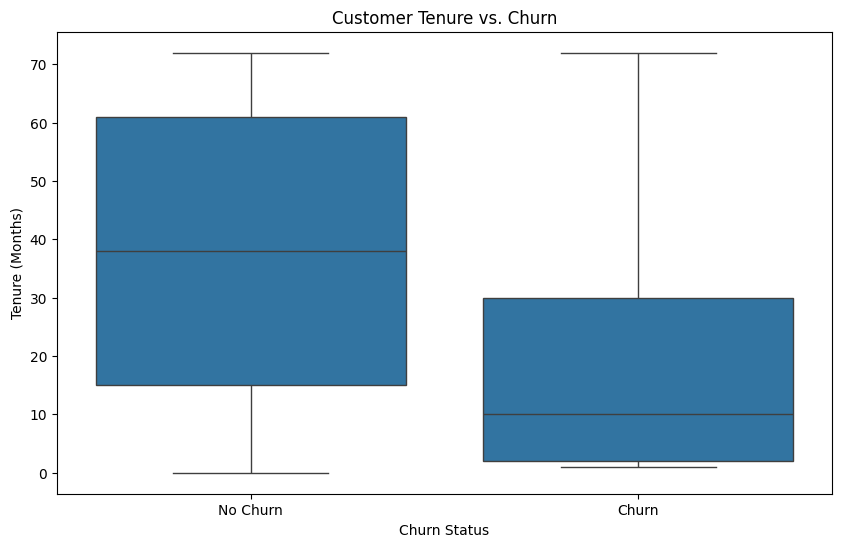

In [74]:
# Plotting the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=train_df)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Churn Status')
plt.ylabel('Tenure (Months)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

<span style="color: orange;">**Observation**</span>   
1. Higher Churn Rates in Early Tenure: Customers in the tenure range of 0-12 months exhibit the highest churn rate of approximately 47.78%. This indicates that new customers are more likely to churn compared to those with longer tenures.
2. Gradual Decrease in Churn Rate: As tenure increases, there is a noticeable decrease in churn rate. Customers in the tenure range of 12-24 months have a lower churn rate of about 29.37%, showing a trend of decreasing churn as customers stay with the service longer.
3. Stabilization of Churn Rate: Beyond the 24-month mark, the churn rate continues to decrease but at a slower rate. Customers with tenures between 24-36 months have a churn rate of approximately 20.56%, indicating a more stable customer base.
4. Lowest Churn Rate for Long-Tenured Customers: The lowest churn rate is observed in customers with tenures exceeding 48 months (48.0, inf], with a churn rate of around 9.71%. This suggests that long-tenured customers are significantly less likely to churn compared to new or relatively new customers.


Overall, the analysis highlights a strong negative correlation between customer tenure and churn rate, with longer-tenured customers exhibiting significantly lower churn rates. This underscores the importance of customer retention strategies focused on maintaining long-term relationships with customers.

<span style="color:red;">This text will appear red</span>

<span style="color: orange;">**This text will appear orange**</span>